### Importing Libraries

In [1]:
import os
import random
import pathlib
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from helper_functions import view_random_image, plot_loss_curves, create_model, load_image, prediction

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Plotting Random Images of all Chess pieces

In [2]:
def plot_all_pieces():
    # Defining the rows and columns to print all emotions
    rows = 1
    columns = 5
    # Defining the image size
    fig = plt.figure(figsize = (10,7))
    
    # Plotting a random 'anger' image
    fig.add_subplot(rows,columns,1)
    anger_image=mpimg.imread("images/train/bishop" + "/" + random.sample(os.listdir("images/train/bishop"), 1)[0])
    plt.imshow(anger_image)
    plt.axis('off')
    plt.title("Bishop")
    
    # Plotting a random 'contempt' image
    fig.add_subplot(rows,columns,2)
    contempt_image=mpimg.imread("images/train/knight" + "/" + random.sample(os.listdir("images/train/knight"), 1)[0])
    plt.imshow(contempt_image)
    plt.axis('off')
    plt.title("Knight")
    
    # Plotting a random 'disgust' image
    fig.add_subplot(rows,columns,3)
    disgust_image=mpimg.imread("images/train/pawn" + "/" + random.sample(os.listdir("images/train/pawn"), 1)[0])
    plt.imshow(disgust_image)
    plt.axis('off')
    plt.title("Pawn")

    # Plotting a random 'fear' image
    fig.add_subplot(rows,columns,4)
    fear_image=mpimg.imread("images/train/queen" + "/" + random.sample(os.listdir("images/train/queen"), 1)[0])
    plt.imshow(fear_image)
    plt.axis('off')
    plt.title("Queen")
    
    # Plotting a random 'happy' image
    fig.add_subplot(rows,columns,5)
    happy_image=mpimg.imread("images/train/rook" + "/" + random.sample(os.listdir("images/train/rook"), 1)[0])
    plt.imshow(happy_image)
    plt.axis('off')
    plt.title("Rook")

### Train & Test Directories

In [3]:
# Initialising train and test directories
train_dir = "images/train/"
test_dir = "images/test/"

### EDA

In [4]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("images"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'images'.
There are 5 directories and 1 images in 'images/test'.
There are 0 directories and 61 images in 'images/test/bishop'.
There are 0 directories and 59 images in 'images/test/rook'.
There are 0 directories and 32 images in 'images/test/pawn'.
There are 0 directories and 94 images in 'images/test/knight'.
There are 0 directories and 35 images in 'images/test/queen'.
There are 5 directories and 0 images in 'images/train'.
There are 0 directories and 80 images in 'images/train/bishop'.
There are 0 directories and 80 images in 'images/train/rook'.
There are 0 directories and 50 images in 'images/train/pawn'.
There are 0 directories and 80 images in 'images/train/knight'.
There are 0 directories and 80 images in 'images/train/queen'.


In [5]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
data_dir = pathlib.Path(train_dir) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['bishop' 'knight' 'pawn' 'queen' 'rook']


Image shape: (224, 224, 3)


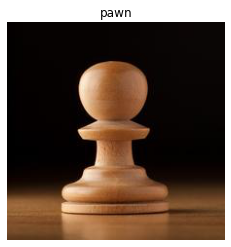

In [6]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

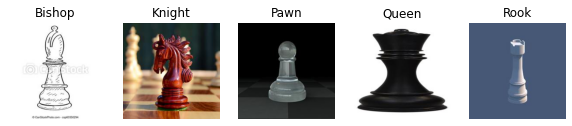

In [7]:
# Plotting random images of all emotions
plot_all_pieces()

### Creating and Training Models

#### Model 1

In [8]:
# Rescale the data and create data generator instances
train_datagen_model1 = ImageDataGenerator(rescale=1/255.)
test_datagen_model1 = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data_model1 = train_datagen_model1.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data_model1 = test_datagen_model1.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 370 images belonging to 5 classes.
Found 281 images belonging to 5 classes.


In [9]:
# Set random seed
tf.random.set_seed(42)

In [10]:
# Initialising Model
model_1 = Sequential()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-12 10:12:08.537678: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-12 10:12:08.538150: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
model_1.add(Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)))
model_1.add(Conv2D(10, 3, activation='relu'))
model_1.add(MaxPool2D())
model_1.add(Conv2D(10, 3, activation='relu'))
model_1.add(Conv2D(10, 3, activation='relu'))
model_1.add(MaxPool2D())
model_1.add(Flatten())
model_1.add(Dense(5, activation='softmax'))

In [12]:
# Displaying model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [13]:
# Compiling the Model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [14]:
# Fit the model
history_1 = model_1.fit(train_data_model1, 
                        epochs=10,
                        steps_per_epoch=len(train_data_model1),
                        validation_data=test_data_model1,
                        validation_steps=len(test_data_model1))

Epoch 1/10


2022-11-12 10:12:08.806053: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-12 10:12:08.976665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 2.0045 - accuracy: 0.1703

2022-11-12 10:12:10.547571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 2s 157ms/step - loss: 2.0045 - accuracy: 0.1703 - val_loss: 1.6269 - val_accuracy: 0.2918
Epoch 2/10
12/12 [==============================] - 2s 132ms/step - loss: 1.6127 - accuracy: 0.2216 - val_loss: 1.5730 - val_accuracy: 0.2776
Epoch 3/10
12/12 [==============================] - 1s 124ms/step - loss: 1.5684 - accuracy: 0.2595 - val_loss: 1.5678 - val_accuracy: 0.3167
Epoch 4/10
12/12 [==============================] - 1s 122ms/step - loss: 1.4984 - accuracy: 0.3865 - val_loss: 1.5266 - val_accuracy: 0.3737
Epoch 5/10
12/12 [==============================] - 1s 124ms/step - loss: 1.3442 - accuracy: 0.4838 - val_loss: 1.5228 - val_accuracy: 0.3772
Epoch 6/10
12/12 [==============================] - 1s 122ms/step - loss: 1.0662 - accuracy: 0.5865 - val_loss: 1.5548 - val_accuracy: 0.4093
Epoch 7/10
12/12 [==============================] - 1s 120ms/step - loss: 0.8118 - accuracy: 0.7000 - val_loss: 1.6085 - val_accuracy: 0.4057
Epoch 8/10
12/12 

In [15]:
# Testimg model on test data
model_1.evaluate(test_data_model1)

9/9 [==============================] - 0s 34ms/step - loss: 2.5983 - accuracy: 0.4698


[2.598309278488159, 0.46975088119506836]

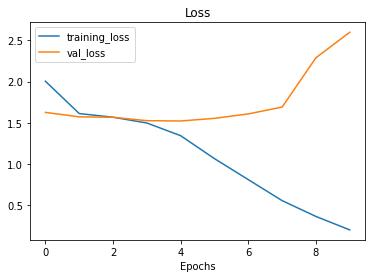

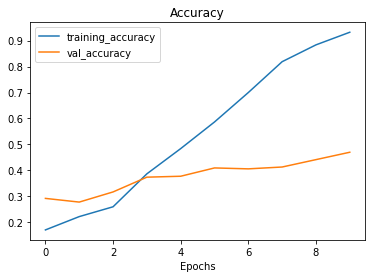

In [16]:
plot_loss_curves(history_1)

#### Model 2

In [17]:
# Rescale the data and create data generator instances
train_datagen_model2 = ImageDataGenerator(rescale=1/255.)
test_datagen_model2 = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data_model2 = train_datagen_model2.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data_model2 = test_datagen_model2.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 370 images belonging to 5 classes.
Found 281 images belonging to 5 classes.


In [18]:
# Set random seed
tf.random.set_seed(42)

In [19]:
# Initialising Model
model_2 = Sequential()

In [20]:
model_2.add(Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)))
model_2.add(Conv2D(32, 3, activation='relu'))
model_2.add(MaxPool2D())
model_2.add(Conv2D(24, 3, activation='relu'))
model_2.add(Conv2D(24, 3, activation='relu'))
model_2.add(MaxPool2D())
model_2.add(Conv2D(12, 3, activation='relu'))
model_2.add(Conv2D(12, 3, activation='relu'))
model_2.add(MaxPool2D())
model_2.add(Flatten())
model_2.add(Dense(5, activation='softmax'))

In [21]:
# Displaying model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 24)      6936      
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 24)      5208      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 24)       0         
 2D)                                                  

In [22]:
# Compiling the Model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [23]:
# Fit the model
history_2 = model_2.fit(train_data_model2, 
                        epochs=10,
                        steps_per_epoch=len(train_data_model2),
                        validation_data=test_data_model2,
                        validation_steps=len(test_data_model2))

Epoch 1/10


2022-11-12 10:12:25.272094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 1.6056 - accuracy: 0.2189

2022-11-12 10:12:27.930233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 4s 272ms/step - loss: 1.6056 - accuracy: 0.2189 - val_loss: 1.5911 - val_accuracy: 0.3310
Epoch 2/10
12/12 [==============================] - 3s 238ms/step - loss: 1.5898 - accuracy: 0.2892 - val_loss: 1.5709 - val_accuracy: 0.2420
Epoch 3/10
12/12 [==============================] - 3s 236ms/step - loss: 1.5527 - accuracy: 0.3000 - val_loss: 1.5165 - val_accuracy: 0.3950
Epoch 4/10
12/12 [==============================] - 3s 253ms/step - loss: 1.4430 - accuracy: 0.3919 - val_loss: 1.5075 - val_accuracy: 0.3843
Epoch 5/10
12/12 [==============================] - 3s 259ms/step - loss: 1.2754 - accuracy: 0.4865 - val_loss: 1.4310 - val_accuracy: 0.4021
Epoch 6/10
12/12 [==============================] - 3s 236ms/step - loss: 1.0860 - accuracy: 0.5703 - val_loss: 1.4441 - val_accuracy: 0.4662
Epoch 7/10
12/12 [==============================] - 3s 237ms/step - loss: 0.8567 - accuracy: 0.6757 - val_loss: 1.8282 - val_accuracy: 0.4662
Epoch 8/10
12/12 

In [24]:
# Testimg model on test data
model_2.evaluate(test_data_model2)

9/9 [==============================] - 1s 69ms/step - loss: 4.3253 - accuracy: 0.4626


[4.325307846069336, 0.4626334607601166]

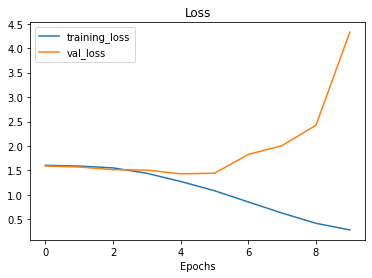

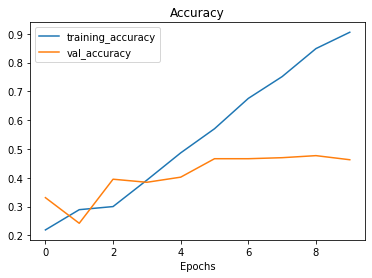

In [25]:
plot_loss_curves(history_2)

### Augmented Data

#### Model 3

In [26]:
# Create augmented data generator instance
from random import shuffle
train_datagen_augmented_model3 = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, 
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.1,
                                             horizontal_flip=True)

train_data_augmented_model3 = train_datagen_augmented_model3.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical',
                                                                  shuffle=False)

test_datagen_model3 = ImageDataGenerator(rescale=1/255.)

test_data_model3 = test_datagen_model3.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 370 images belonging to 5 classes.
Found 281 images belonging to 5 classes.


In [27]:
train_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

Found 370 images belonging to 5 classes.


In [28]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented_model3.next()

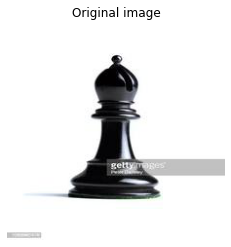

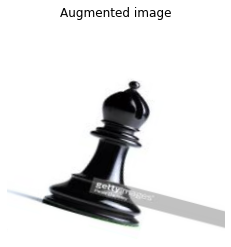

In [29]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [30]:
# Set Seed
tf.random.set_seed(42)

In [31]:
# Initialise Model
model_3 = Sequential()

In [32]:
model_3.add(Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)))
model_3.add(Conv2D(32, 3, activation='relu'))
model_3.add(MaxPool2D())
model_3.add(Conv2D(24, 3, activation='relu'))
model_3.add(Conv2D(24, 3, activation='relu'))
model_3.add(MaxPool2D())
model_3.add(Conv2D(12, 3, activation='relu'))
model_3.add(Conv2D(12, 3, activation='relu'))
model_3.add(MaxPool2D())
model_3.add(Flatten())
model_3.add(Dense(5, activation='softmax'))

In [33]:
# Model Summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 24)      6936      
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 24)      5208      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 53, 53, 24)       0         
 2D)                                                  

In [34]:
# Compiling the Model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [35]:
# Fit the model
history_3 = model_3.fit(train_data_augmented_model3, 
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_model3),
                        validation_data=test_data_model3,
                        validation_steps=len(test_data_model3))

Epoch 1/10


2022-11-12 10:12:56.310458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 1.6534 - accuracy: 0.1405

2022-11-12 10:12:59.024769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 3s 261ms/step - loss: 1.6534 - accuracy: 0.1405 - val_loss: 1.6085 - val_accuracy: 0.2100
Epoch 2/10
12/12 [==============================] - 3s 254ms/step - loss: 1.6107 - accuracy: 0.2054 - val_loss: 1.6071 - val_accuracy: 0.2028
Epoch 3/10
12/12 [==============================] - 3s 273ms/step - loss: 1.6097 - accuracy: 0.2135 - val_loss: 1.6086 - val_accuracy: 0.2100
Epoch 4/10
12/12 [==============================] - 3s 267ms/step - loss: 1.6090 - accuracy: 0.2162 - val_loss: 1.6085 - val_accuracy: 0.2100
Epoch 5/10
12/12 [==============================] - 3s 258ms/step - loss: 1.6094 - accuracy: 0.2162 - val_loss: 1.6076 - val_accuracy: 0.2100
Epoch 6/10
12/12 [==============================] - 3s 251ms/step - loss: 1.6085 - accuracy: 0.2162 - val_loss: 1.6075 - val_accuracy: 0.2100
Epoch 7/10
12/12 [==============================] - 3s 248ms/step - loss: 1.6083 - accuracy: 0.2162 - val_loss: 1.6075 - val_accuracy: 0.2100
Epoch 8/10
12/12 

In [36]:
# Testimg model on test data
model_3.evaluate(test_data_model3)

9/9 [==============================] - 1s 67ms/step - loss: 1.6065 - accuracy: 0.2100


[1.6064505577087402, 0.20996440947055817]

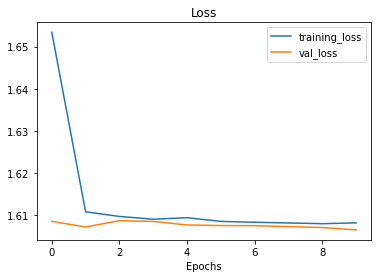

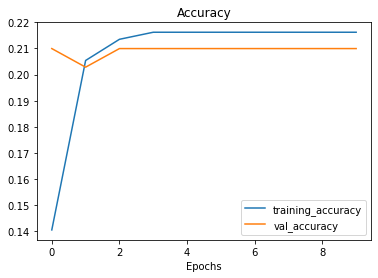

In [37]:
plot_loss_curves(history_3)

#### Model 4

In [38]:
# Create augmented data generator instance
from random import shuffle
train_datagen_augmented_model4 = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=40, 
                                             width_shift_range=0.3,
                                             height_shift_range=0.3,
                                             zoom_range=0.4,
                                             horizontal_flip=True)

train_data_augmented_model4 = train_datagen_augmented_model4.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical',
                                                                  shuffle=True)

test_datagen_model4 = ImageDataGenerator(rescale=1/255.)

test_data_model4 = test_datagen_model4.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 370 images belonging to 5 classes.
Found 281 images belonging to 5 classes.


In [39]:
# Set Seed
tf.random.set_seed(42)

In [40]:
# Initialise Model
model_4 = Sequential()

In [41]:
model_4.add(Conv2D(100, 3, activation='relu', input_shape=(224, 224, 3)))
model_4.add(Conv2D(100, 3, activation='relu'))
model_4.add(MaxPool2D())
model_4.add(Conv2D(75, 3, activation='relu'))
model_4.add(Conv2D(75, 3, activation='relu'))
model_4.add(MaxPool2D())
model_4.add(Conv2D(50, 3, activation='relu'))
model_4.add(Conv2D(50, 3, activation='relu'))
model_4.add(MaxPool2D())
model_4.add(Conv2D(20, 3, activation='relu'))
model_4.add(Conv2D(20, 3, activation='relu'))
model_4.add(MaxPool2D())
model_4.add(Flatten())
model_4.add(Dense(5, activation='softmax'))

In [42]:
# Displaying model summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 100)     2800      
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 100)     90100     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 100)    0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 75)      67575     
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 75)      50700     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 75)       0         
 2D)                                                  

In [43]:
# Compiling the Model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [44]:
# Fit the model
history_4 = model_4.fit(train_data_augmented_model4, 
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_model4),
                        validation_data=test_data_model4,
                        validation_steps=len(test_data_model4))

Epoch 1/10


2022-11-12 10:13:30.106253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 1.6131 - accuracy: 0.2135

2022-11-12 10:13:48.723920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 22s 2s/step - loss: 1.6131 - accuracy: 0.2135 - val_loss: 1.6086 - val_accuracy: 0.2135
Epoch 2/10
12/12 [==============================] - 21s 2s/step - loss: 1.6074 - accuracy: 0.2081 - val_loss: 1.6021 - val_accuracy: 0.1957
Epoch 3/10
12/12 [==============================] - 20s 2s/step - loss: 1.6028 - accuracy: 0.1757 - val_loss: 1.5970 - val_accuracy: 0.2100
Epoch 4/10
12/12 [==============================] - 20s 2s/step - loss: 1.5973 - accuracy: 0.2189 - val_loss: 1.5915 - val_accuracy: 0.2171
Epoch 5/10
12/12 [==============================] - 20s 2s/step - loss: 1.5971 - accuracy: 0.2351 - val_loss: 1.5904 - val_accuracy: 0.1637
Epoch 6/10
12/12 [==============================] - 21s 2s/step - loss: 1.6005 - accuracy: 0.2081 - val_loss: 1.5926 - val_accuracy: 0.1530
Epoch 7/10
12/12 [==============================] - 20s 2s/step - loss: 1.5973 - accuracy: 0.1946 - val_loss: 1.5916 - val_accuracy: 0.1673
Epoch 8/10
12/12 [=============

In [45]:
model_4.evaluate(test_data_model4)

9/9 [==============================] - 3s 353ms/step - loss: 1.5845 - accuracy: 0.2740


[1.5845271348953247, 0.27402135729789734]

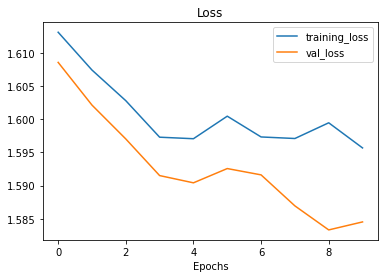

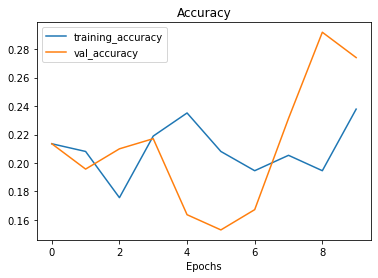

In [46]:
plot_loss_curves(history_4)

### Transfer Learning

#### Model 5

In [8]:
# Rescale the data and create data generator instances
train_datagen_model5 = ImageDataGenerator(rescale=1/255.)
test_datagen_model5 = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data_model5 = train_datagen_model5.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data_model5 = test_datagen_model5.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 370 images belonging to 5 classes.
Found 281 images belonging to 5 classes.


In [9]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [10]:
# Create model
resnet_model = create_model(resnet_url, num_classes=train_data_model5.num_classes)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-12 10:37:43.291053: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-12 10:37:43.291188: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
# Displaying model summary
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 5)                 10245     
                                                                 
Total params: 23,575,045
Trainable params: 10,245
Non-trainable params: 23,564,800
_________________________________________________________________


In [12]:
# Fit the model
resnet_history = resnet_model.fit(train_data_model5,
                                  epochs=10,
                                  steps_per_epoch=len(train_data_model5),
                                  validation_data=test_data_model5,
                                  validation_steps=len(test_data_model5))

Epoch 1/10


2022-11-12 10:37:44.386023: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-12 10:37:45.327868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 1.3348 - accuracy: 0.4649

2022-11-12 10:37:49.137819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 7s 539ms/step - loss: 1.3348 - accuracy: 0.4649 - val_loss: 1.0842 - val_accuracy: 0.6085
Epoch 2/10
12/12 [==============================] - 6s 475ms/step - loss: 0.7845 - accuracy: 0.6946 - val_loss: 0.9273 - val_accuracy: 0.6548
Epoch 3/10
12/12 [==============================] - 6s 474ms/step - loss: 0.5852 - accuracy: 0.8027 - val_loss: 0.8044 - val_accuracy: 0.7046
Epoch 4/10
12/12 [==============================] - 6s 504ms/step - loss: 0.4544 - accuracy: 0.8757 - val_loss: 0.7607 - val_accuracy: 0.7331
Epoch 5/10
12/12 [==============================] - 6s 478ms/step - loss: 0.3703 - accuracy: 0.9216 - val_loss: 0.7297 - val_accuracy: 0.7224
Epoch 6/10
12/12 [==============================] - 6s 495ms/step - loss: 0.3153 - accuracy: 0.9297 - val_loss: 0.7215 - val_accuracy: 0.7224
Epoch 7/10
12/12 [==============================] - 5s 469ms/step - loss: 0.2730 - accuracy: 0.9459 - val_loss: 0.7177 - val_accuracy: 0.7331
Epoch 8/10
12/12 

In [13]:
# Evaluating model on test data
resnet_model.evaluate(test_data_model5)

9/9 [==============================] - 2s 266ms/step - loss: 0.6846 - accuracy: 0.7544


[0.6846436858177185, 0.754448413848877]

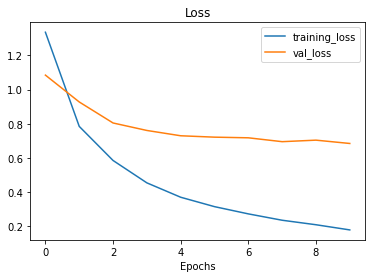

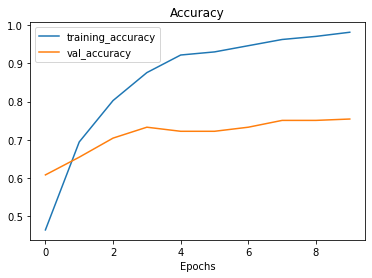

In [14]:
plot_loss_curves(resnet_history)

#### Model 6

In [54]:
# Rescale the data and create data generator instances
train_datagen_model6 = ImageDataGenerator(rescale=1/255.)
test_datagen_model6 = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data_model6 = train_datagen_model6.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data_model6 = test_datagen_model6.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 370 images belonging to 5 classes.
Found 281 images belonging to 5 classes.


In [55]:
# EfficientNetB0 feature vector (version 2)
efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

In [56]:
# Create model
efficientnet_model = create_model(efficientnet_url, num_classes=train_data_model5.num_classes)

# Compile
efficientnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [57]:
# Displaying model summary
efficientnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             5919312   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 5)                 6405      
                                                                 
Total params: 5,925,717
Trainable params: 6,405
Non-trainable params: 5,919,312
_________________________________________________________________


In [58]:
# Fit the model
efficientnet_history = efficientnet_model.fit(train_data_model5,
                                  epochs=10,
                                  steps_per_epoch=len(train_data_model5),
                                  validation_data=test_data_model5,
                                  validation_steps=len(test_data_model5))

Epoch 1/10


2022-11-12 10:18:08.101154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 1.5173 - accuracy: 0.3568

2022-11-12 10:18:11.732476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 9s 495ms/step - loss: 1.5173 - accuracy: 0.3568 - val_loss: 1.3575 - val_accuracy: 0.4875
Epoch 2/10
12/12 [==============================] - 3s 255ms/step - loss: 1.1855 - accuracy: 0.5973 - val_loss: 1.1411 - val_accuracy: 0.6228
Epoch 3/10
12/12 [==============================] - 3s 263ms/step - loss: 0.9545 - accuracy: 0.7703 - val_loss: 1.0280 - val_accuracy: 0.6904
Epoch 4/10
12/12 [==============================] - 3s 248ms/step - loss: 0.7993 - accuracy: 0.8324 - val_loss: 0.9347 - val_accuracy: 0.7082
Epoch 5/10
12/12 [==============================] - 3s 242ms/step - loss: 0.6955 - accuracy: 0.8622 - val_loss: 0.8691 - val_accuracy: 0.7153
Epoch 6/10
12/12 [==============================] - 3s 250ms/step - loss: 0.6137 - accuracy: 0.8865 - val_loss: 0.8279 - val_accuracy: 0.7402
Epoch 7/10
12/12 [==============================] - 3s 243ms/step - loss: 0.5548 - accuracy: 0.9054 - val_loss: 0.8019 - val_accuracy: 0.7438
Epoch 8/10
12/12 

In [59]:
# Evaluating model on test data
efficientnet_model.evaluate(test_data_model6)

9/9 [==============================] - 1s 156ms/step - loss: 0.7257 - accuracy: 0.7580


[0.725696325302124, 0.7580071091651917]

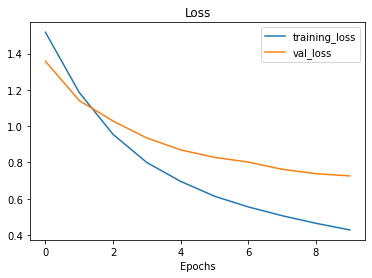

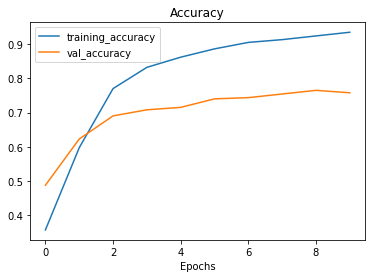

In [60]:
plot_loss_curves(efficientnet_history)

#### From the above trained models we can see the ResNet Model has achieved an accuracy of 80%, so we will be predicting images on the ResNet Model.

## Predicting Images

2022-11-12 10:38:44.860322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


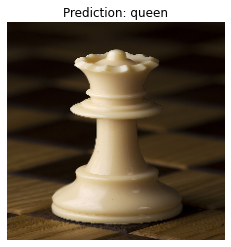

In [15]:
prediction(resnet_model,"test1.jpg", class_names)

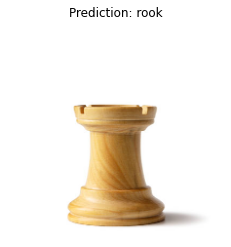

In [16]:
prediction(resnet_model,"test2.jpg", class_names)

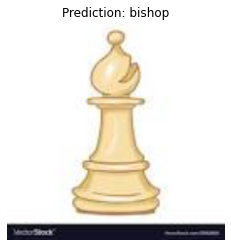

In [17]:
prediction(resnet_model,"test3.jpeg", class_names)

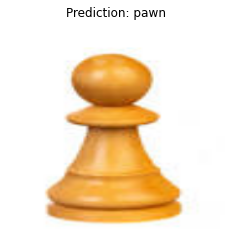

In [18]:
prediction(resnet_model,"test4.jpeg", class_names)

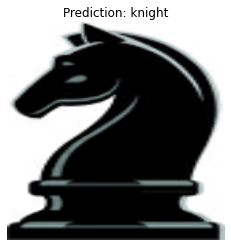

In [19]:
prediction(resnet_model,"test5.jpg", class_names)